In [6]:
import os
module_path = os.path.abspath(os.path.join('..'))
#ONLY RUN ONCE!
os.chdir(module_path)

In [4]:
from agent_components.demand.learning.data import make_sequences_from_historical, parse_usage_game_log, clear
from util.learning_utils import ModelWriter, TbWriterHelper, get_callbacks_with_generator, get_usage_file_paths
import agent_components.demand.learning.data as data
import numpy as np
import pandas as pd
from notebooks.helpers import *
import random
#basic requirements for doing ML
import keras
from keras.initializers import RandomUniform
from keras.layers import CuDNNLSTM, Dropout, Activation
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
import time
from keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

import util.config as cfg


Using TensorFlow backend.


In [7]:
game_files = get_usage_file_paths()
f = game_files[0]

In [10]:
d= parse_usage_game_log(f, pp_type='none')


In [11]:
data_all = np.array(list(d.values()))
scaler = MinMaxScaler()

In [12]:
scaler.fit(data_all.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
frosty_normal = np.array(d['FrostyStorage'])
frosty_scaled_all = scaler.transform(frosty_normal.reshape(-1,1)).flatten()

In [14]:
frosty_scaled_alone = MinMaxScaler().fit_transform(frosty_normal.reshape(-1,1)).flatten()

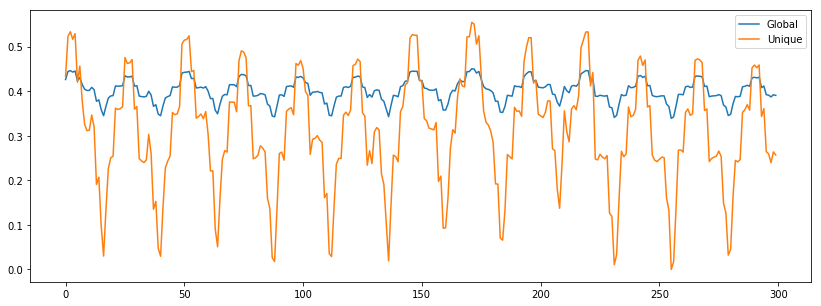

In [18]:
df = pd.DataFrame(np.array([frosty_scaled_all[:300], frosty_scaled_alone[:300]]).transpose(), columns=['Global', 'Unique'])
df.plot(figsize=(14,5))